In [4]:
def ln(x, n_max=20):

    ln = 0.0
    for n in range(1, n_max + 1):
        termo = (((-1) ** (n - 1)) * (x - 1) ** n )/ n
        ln += termo

    return ln
print(ln(2))
print(math.log(2))

0.6687714031754279
0.6931471805599453


Comparação com o tempo


In [3]:
import timeit

start = timeit.default_timer()
ln_1=(math.log(2))
t_ln = timeit.default_timer() - start

start = timeit.default_timer()
ln(2)
t_lnM = timeit.default_timer() - start

print('ln numpy: ',t_ln*1000 , " milissegundos")
print('ln meu: ', t_lnM*1000, " milissegundos")

ln numpy:  0.037971000011793876  milissegundos
ln meu:  0.0388599999894268  milissegundos


Margem de erro e tempo de execução (Comparativo com built-in)

Valor de N para menor margem de erro: 30 


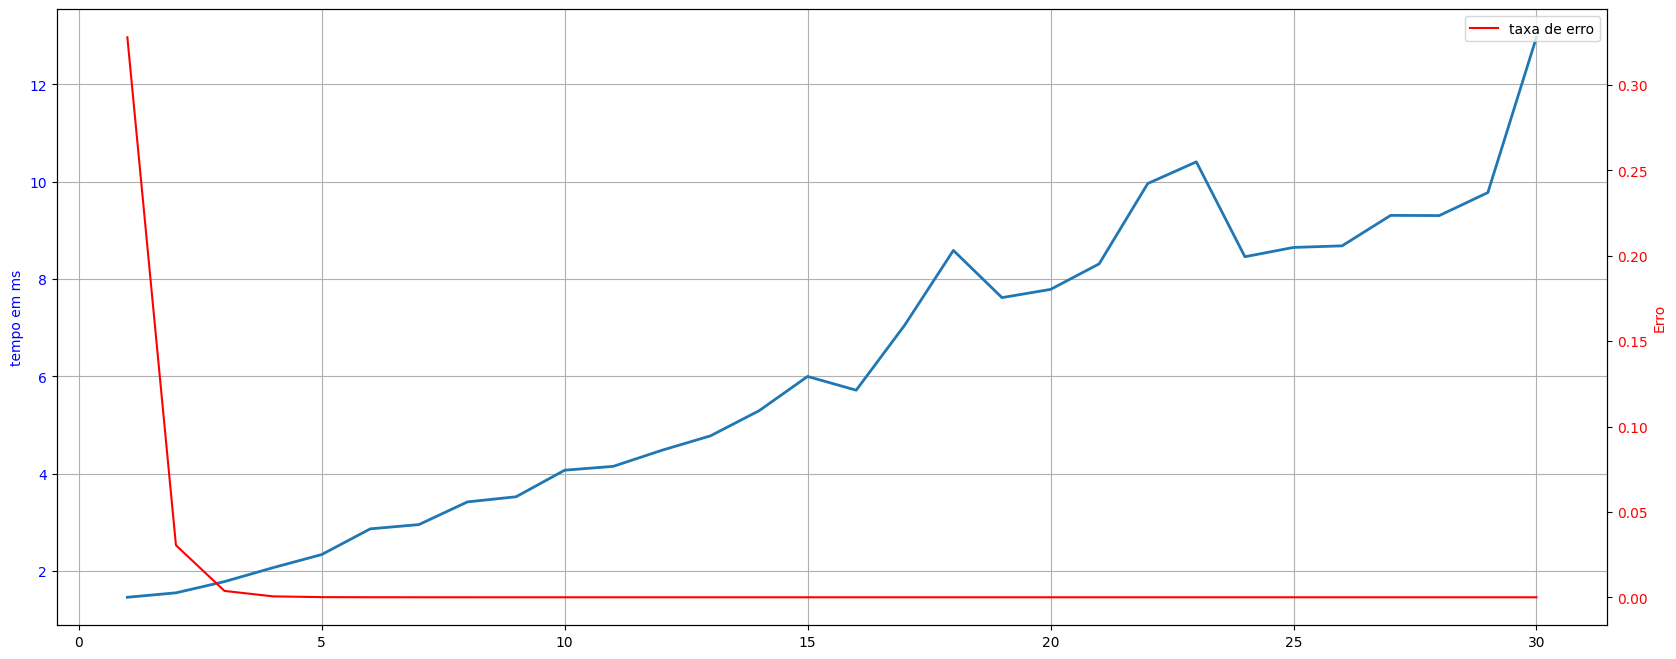

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

n_max = 30

enes = np.arange(1,n_max+1)
medias = np.zeros(n_max)
error = np.zeros(n_max)
x = np.linspace(1, 0.5 )
repetições = 100

def tempo(x,n):
  start = timeit.default_timer()
  valor = ln(x,n)
  loss_function = pow(valor - np.log(x),2) # erro quadrático
  return timeit.default_timer() - start, loss_function

# https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html
tempo_vector = np.vectorize(tempo)
for n in enes:
  calc, erro = tempo_vector(x,n)
  medias[n-1] = np.mean(calc)*1000000 # microssegundos
  error[n-1] = np.sum(erro)

min_error_index = np.argmin(error, axis=None, out=None) + 1
print(f"Valor de N para menor margem de erro: {min_error_index} ")

fig, ax = plt.subplots()
fig.set_size_inches(20,8)
ax.plot(enes, medias, linewidth=2.0,label='tempo de execução')
ax.grid()
ax.set_ylabel('tempo em ms', color="blue")
ax.tick_params(axis='y', labelcolor="blue")
ax2 = ax.twinx() # instantiate a second axes that shares the same x-axis

# plotando 2 gráficos com escalas diferentes
ax2.set_ylabel('Erro', color="red")
ax2.plot(enes, error, color="red",label = 'taxa de erro')
ax2.tick_params(axis='y', labelcolor="red")
plt.legend()

valor escolhido seria 3 , ja q tem uma boa precisão e um tempo rapido

Diferença das duas funções

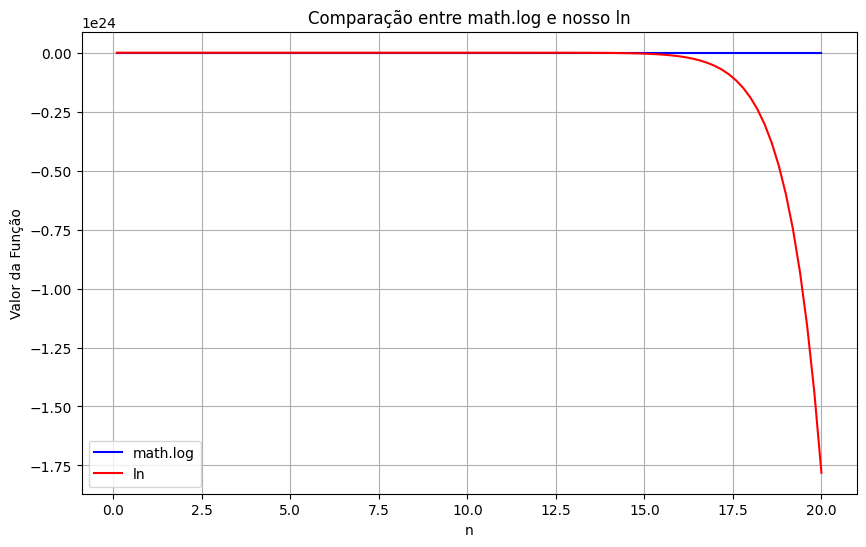

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def ln(x, n_max=20):

    ln = 0.0
    for n in range(1, n_max + 1):
        termo = ((-1) ** (n - 1)) * (x - 1) ** n / n
        ln += termo

    return ln


x = np.linspace(0.1, 20, 100)


math_log_val = [math.log(x) for x in x]
ln_val = [ln(x) for x in x]

plt.figure(figsize=(10, 6))
plt.plot(x, math_log_val, label='math.log', color='blue')
plt.plot(x, ln_val, label='ln', color='red')
plt.xlabel('n')
plt.ylabel('Valor da Função')
plt.title('Comparação entre math.log e nosso ln')
plt.legend()
plt.grid(True)
plt.show()